# Multiple Linear Regression

# Question-2 : Toyota Corolla

In [2]:
# Author: Shreyas Shashikant Vaishnav
# Purpose: Multiple Linear Regression
# importing the basic libraries for the MLR

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
toyota=pd.read_csv(r"D:\Resume\Data Science\Assignments_SV\Data Science Assignment\Multiple Linear Regression\ToyotaCorolla.csv", encoding = 'unicode_escape')

In [5]:
toyota.head(3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0


In [6]:
# using the info to get the basic idea of the data
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [7]:
# checking for the null or NAN values
toyota.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [8]:
# checking for the correlation of the data

toyota.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


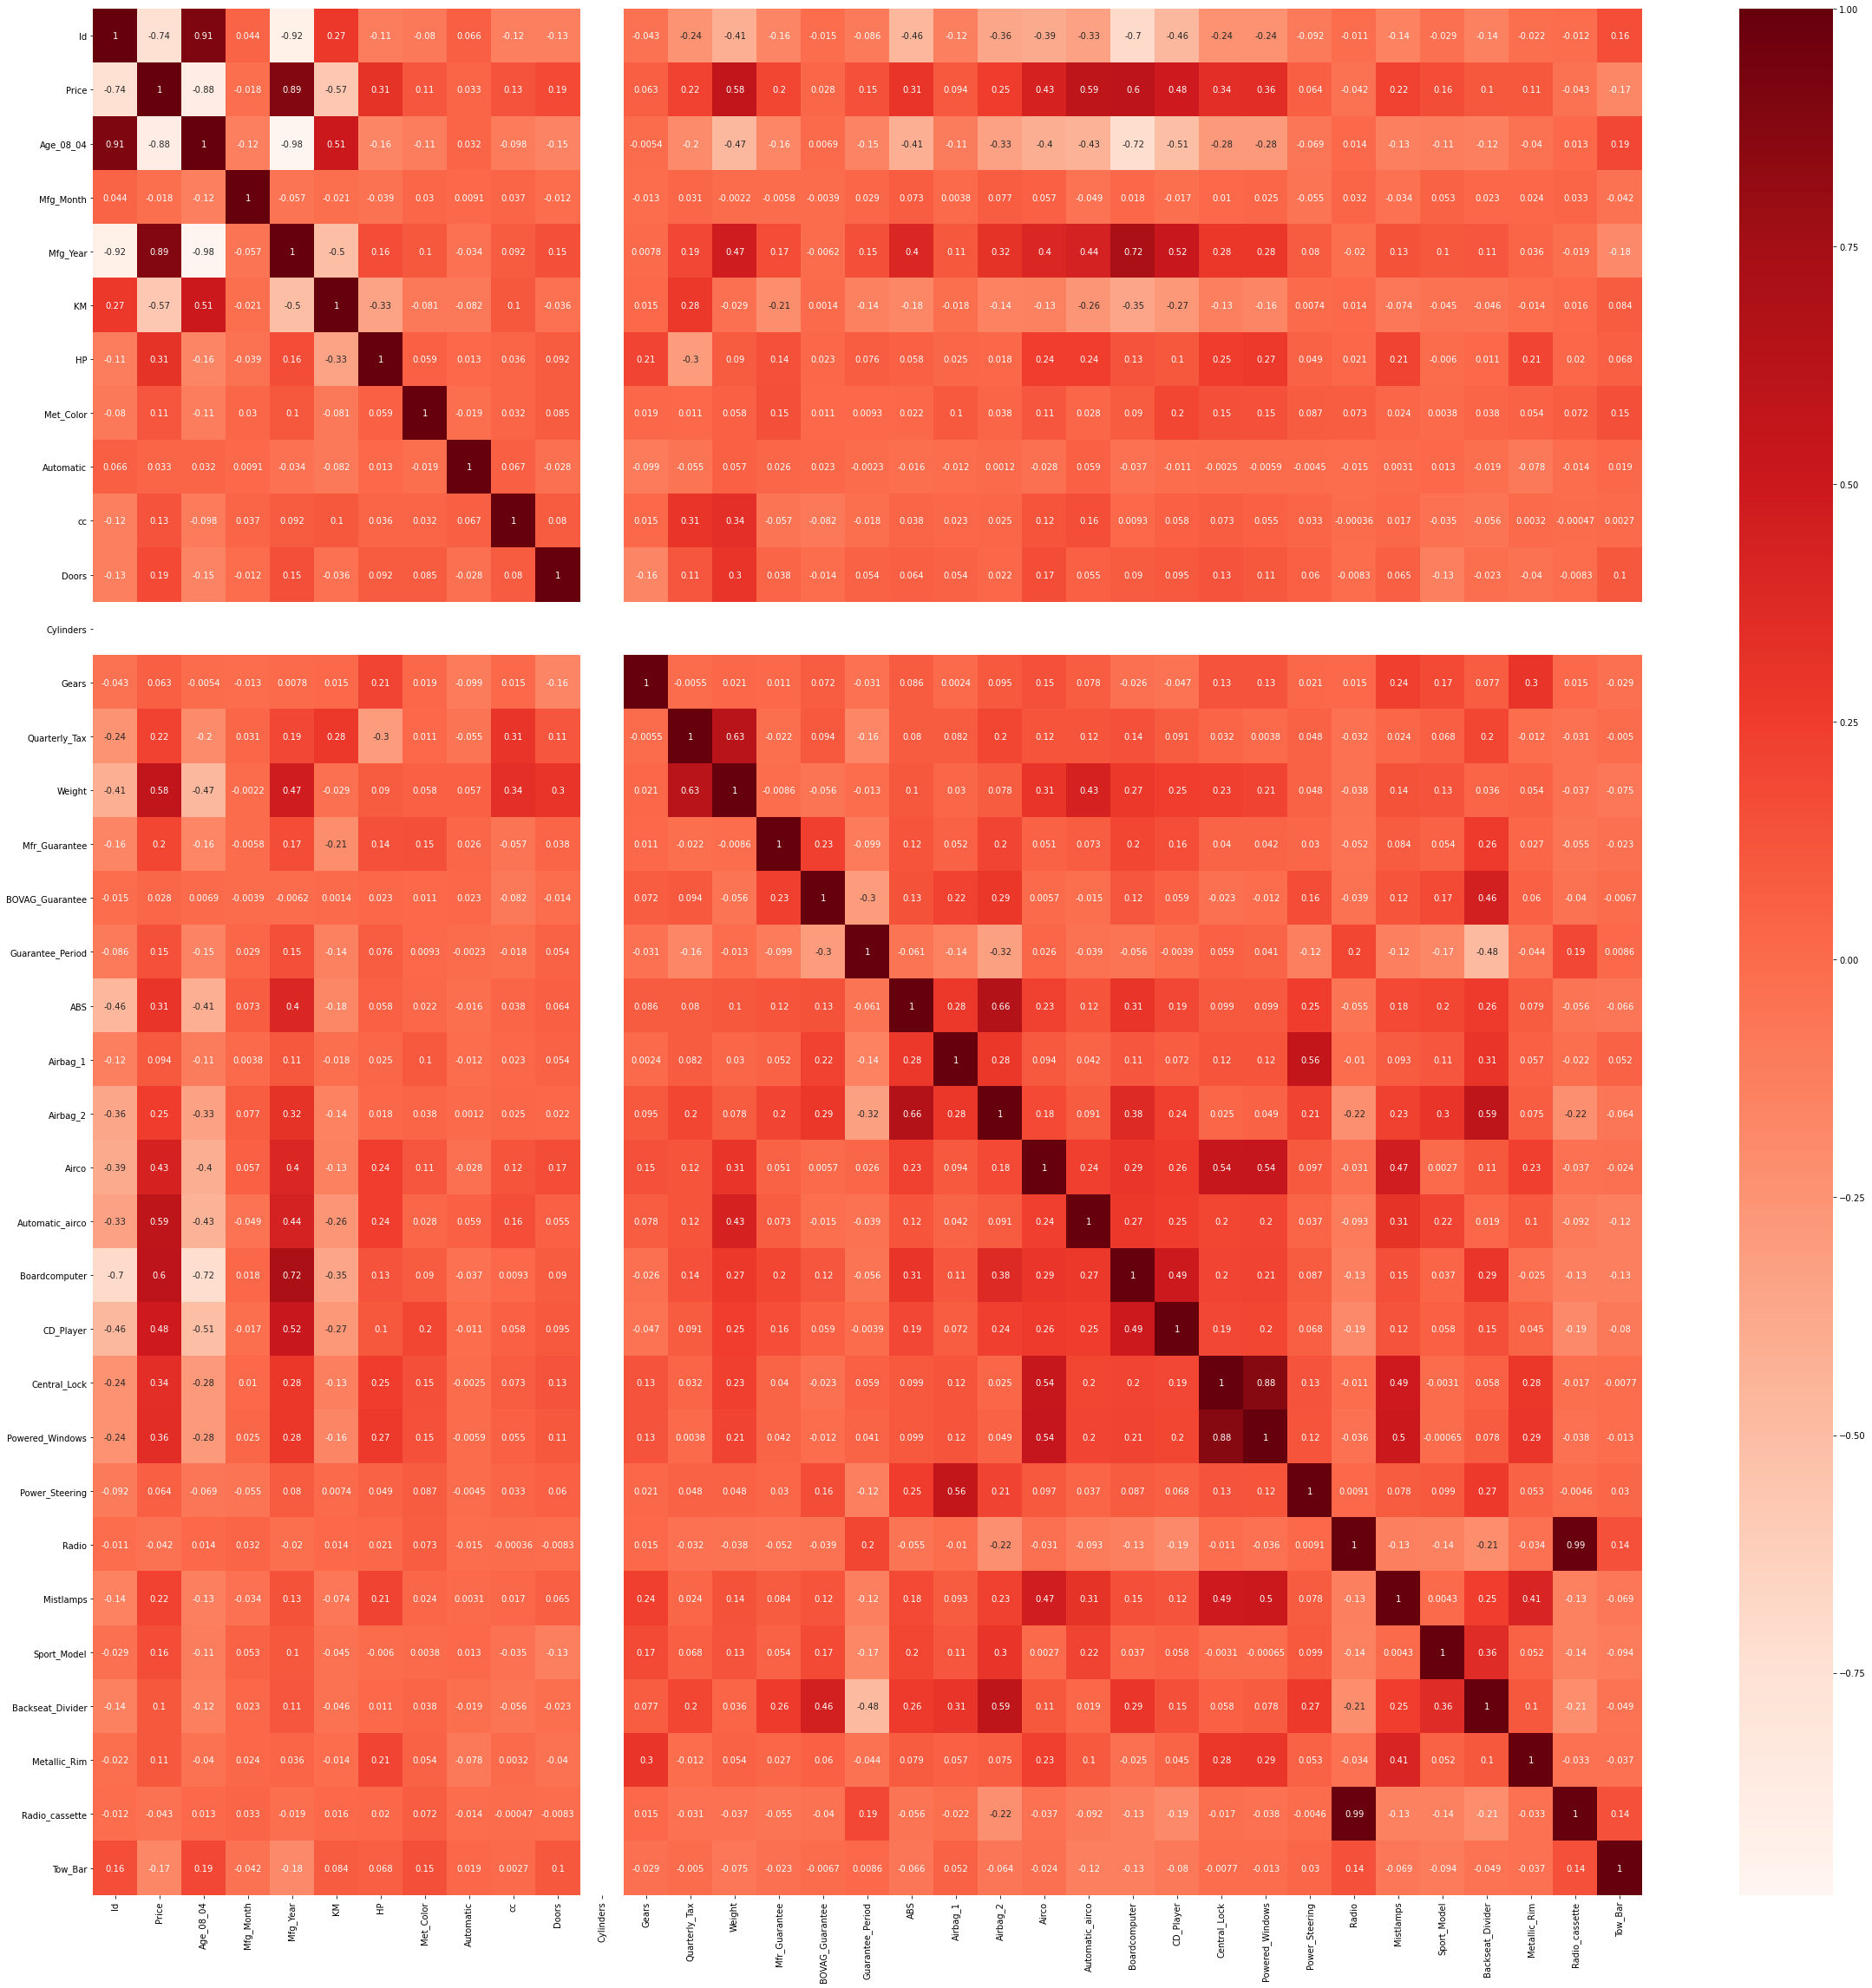

In [14]:
C = toyota.corr()
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(C,annot=True,cmap='Reds', ax = ax)
plt.show()

In [17]:
# creating the new data with few of the original data columns avoiding the useless columns
toyota1 = toyota.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [18]:
toyota1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [19]:
# renaming the two columns

toyota2 = toyota1.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis = 1)

In [20]:
toyota2.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


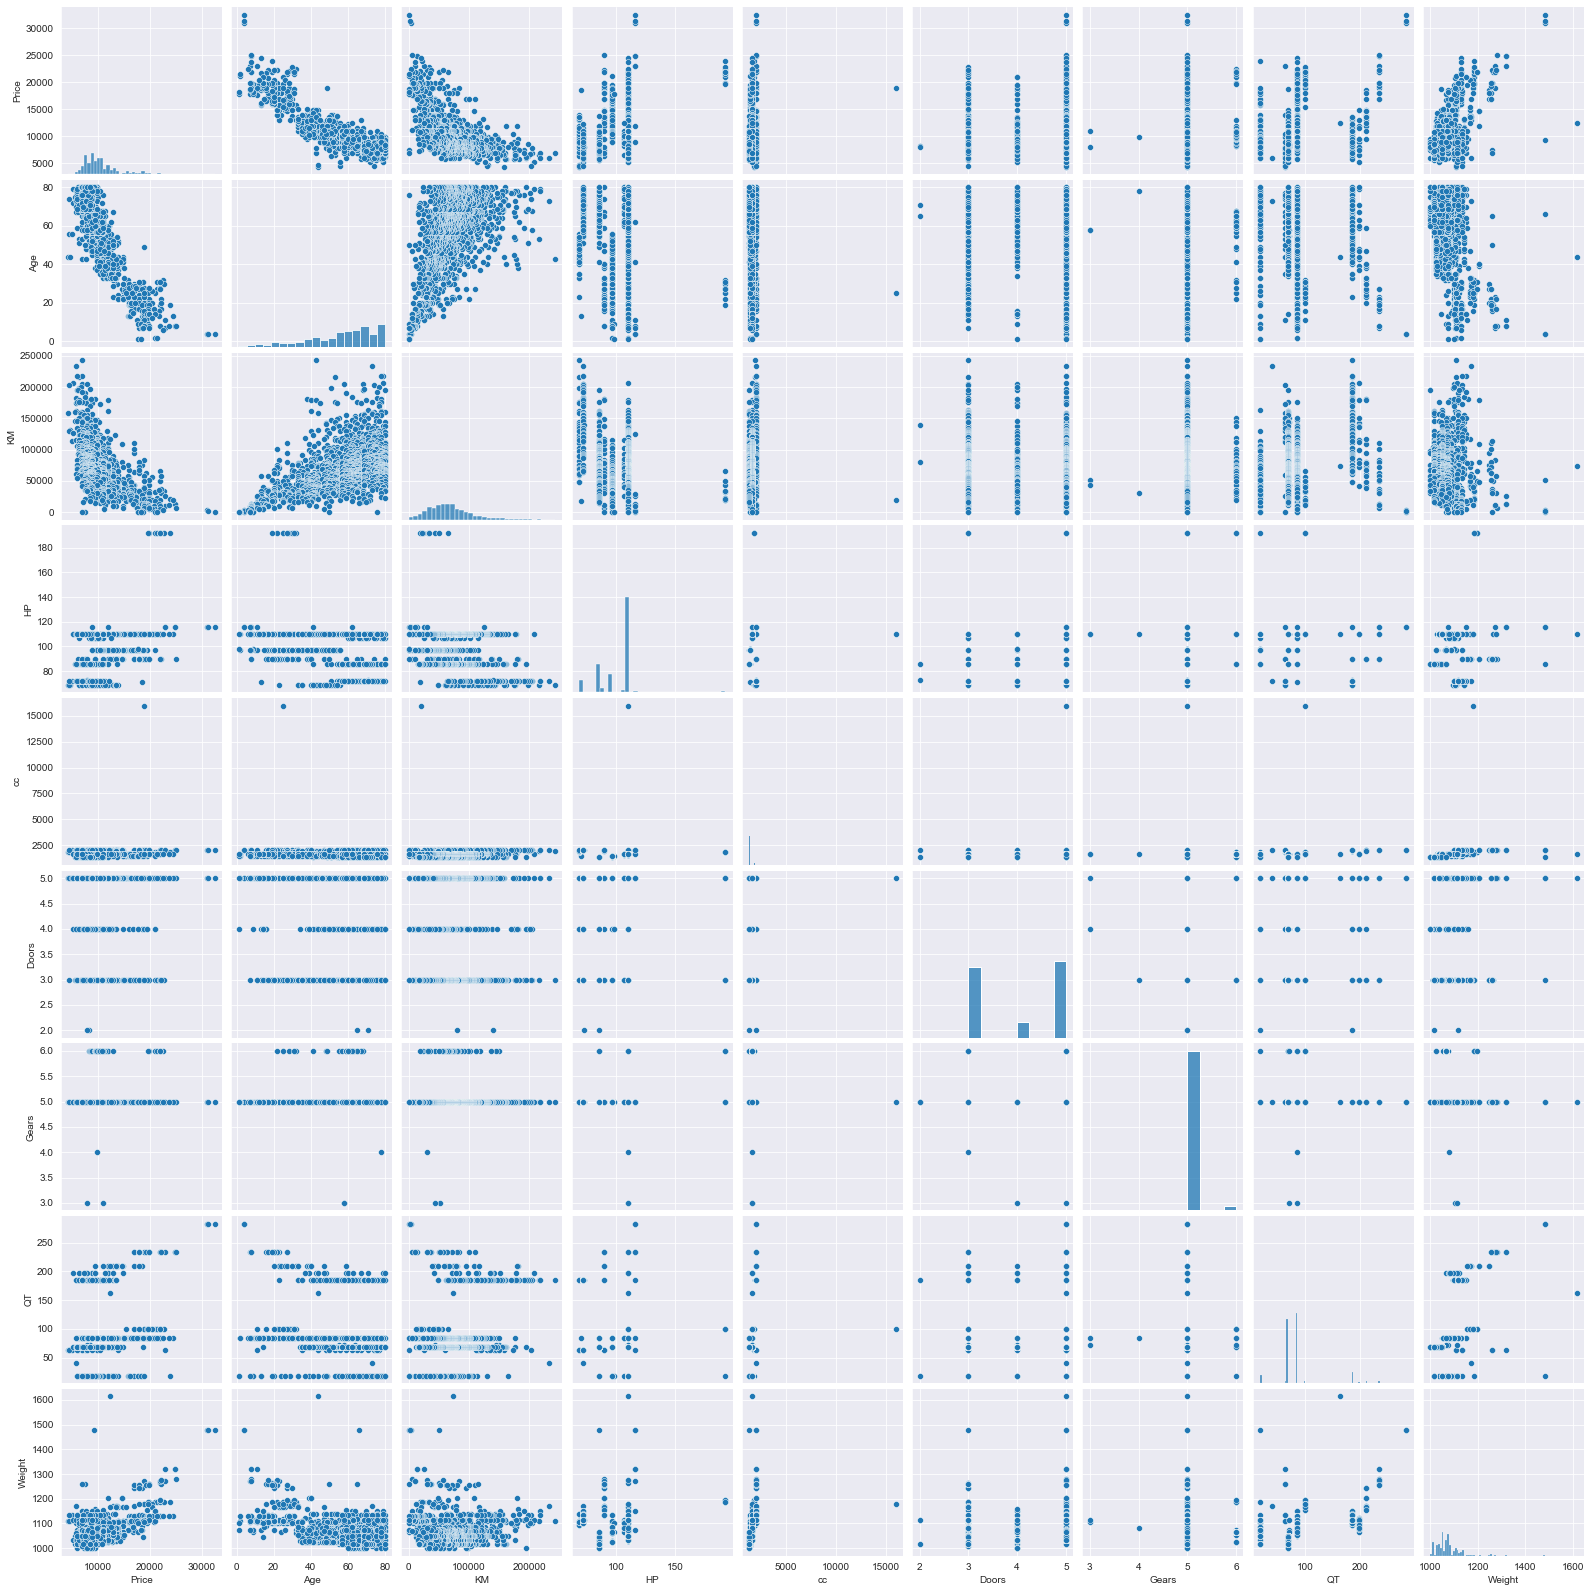

In [21]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota2)

In [11]:
# to get the basic idea of the data using the info function
toyota2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [12]:
# checking for the null or NAn values

toyota2.isnull().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

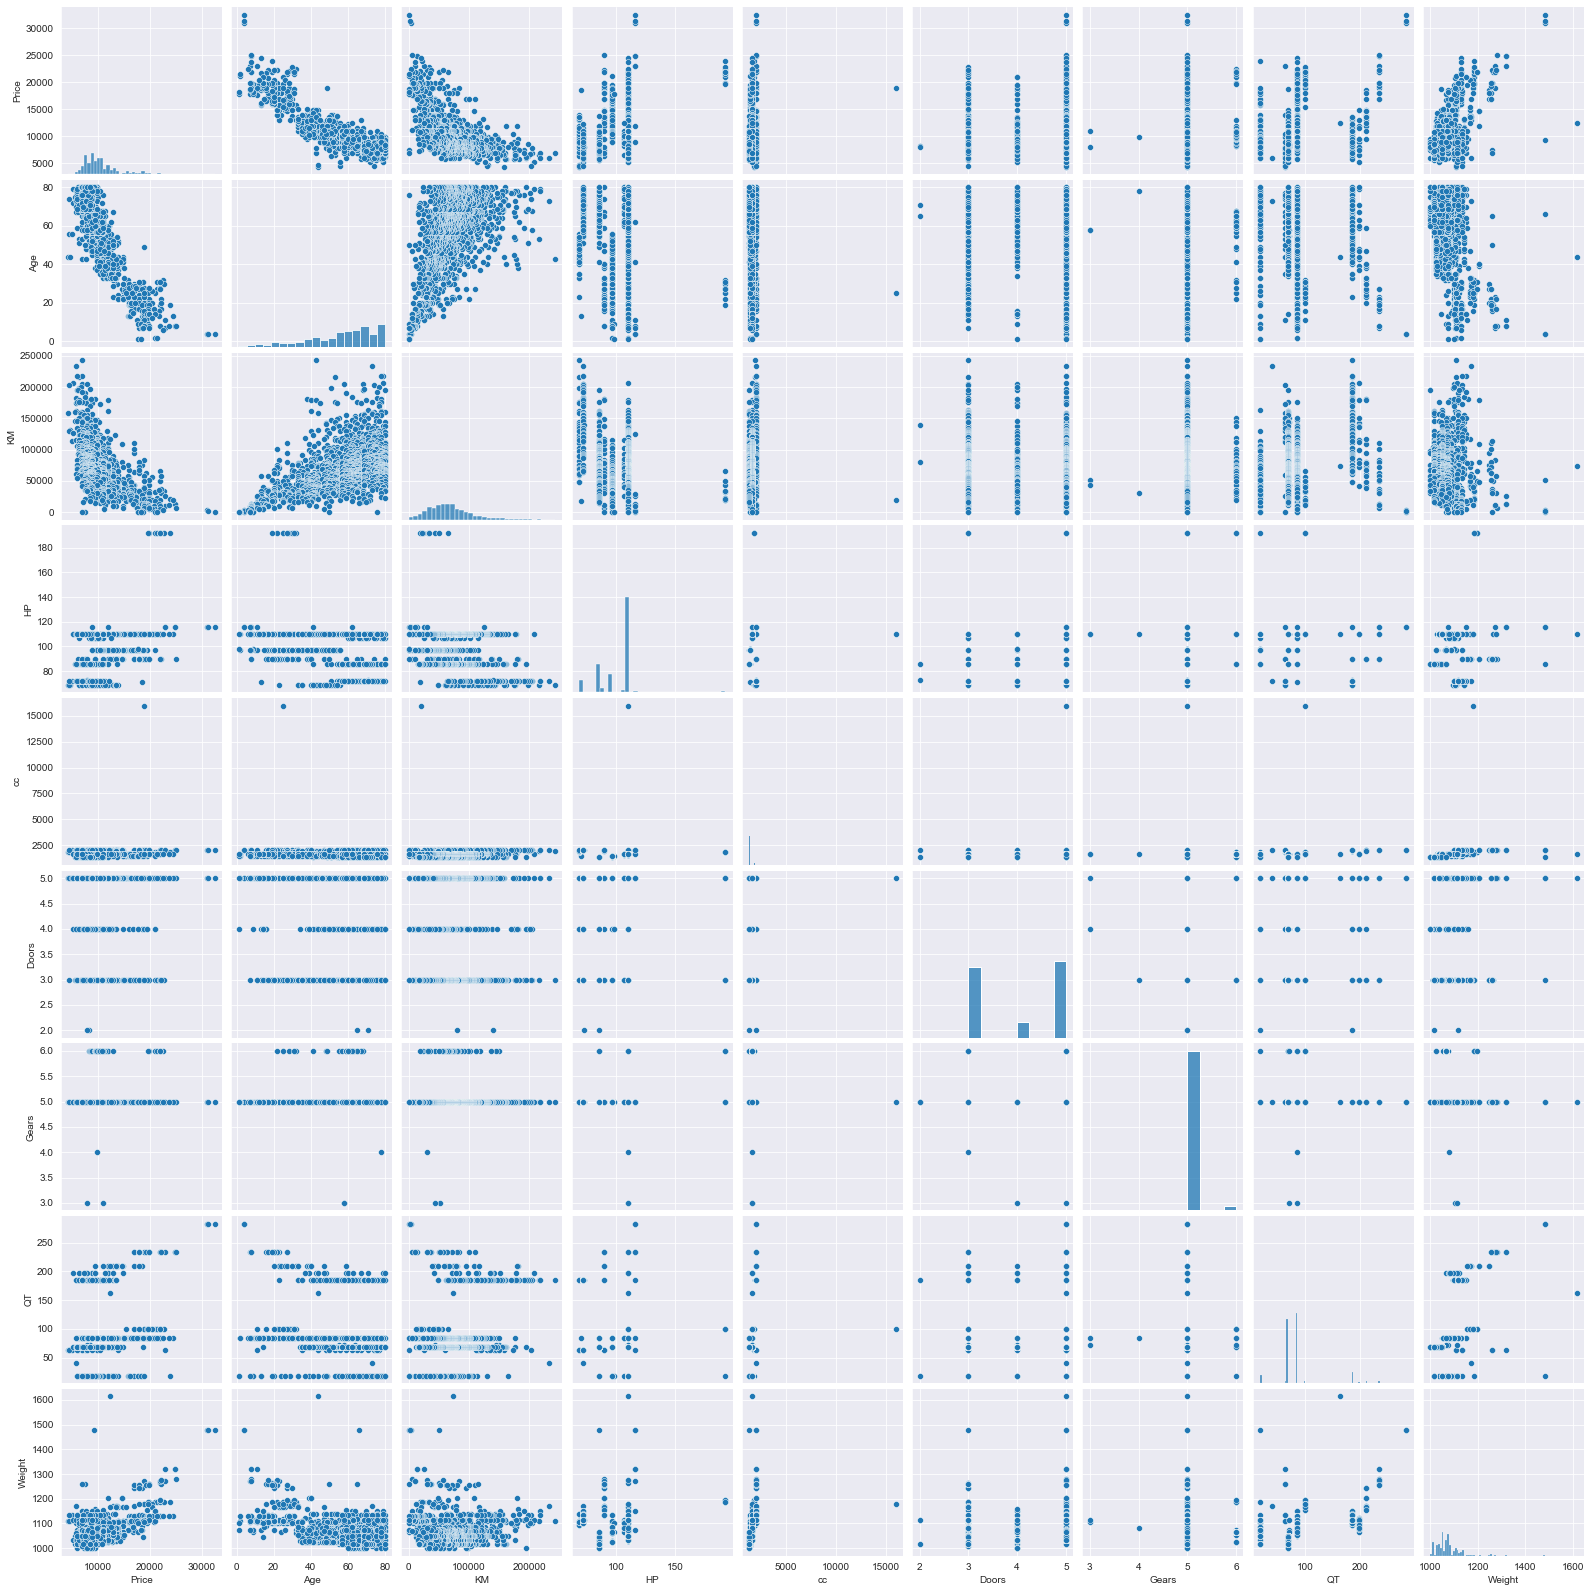

In [13]:
# plotting the pair plot using the darkgrid style

sns.set_style(style = 'darkgrid')
sns.pairplot(toyota2)
plt.show()

In [14]:
# dropping the doors and the gears columns

model = toyota2.drop(['Doors','Gears'],axis=1)

In [15]:
model.head()

,Price,Age,KM,HP,cc,QT,Weight
0,13500,23,46986,90,2000,210,1165
1,13750,23,72937,90,2000,210,1165
2,13950,24,41711,90,2000,210,1165
3,14950,26,48000,90,2000,210,1165
4,13750,30,38500,90,2000,210,1170


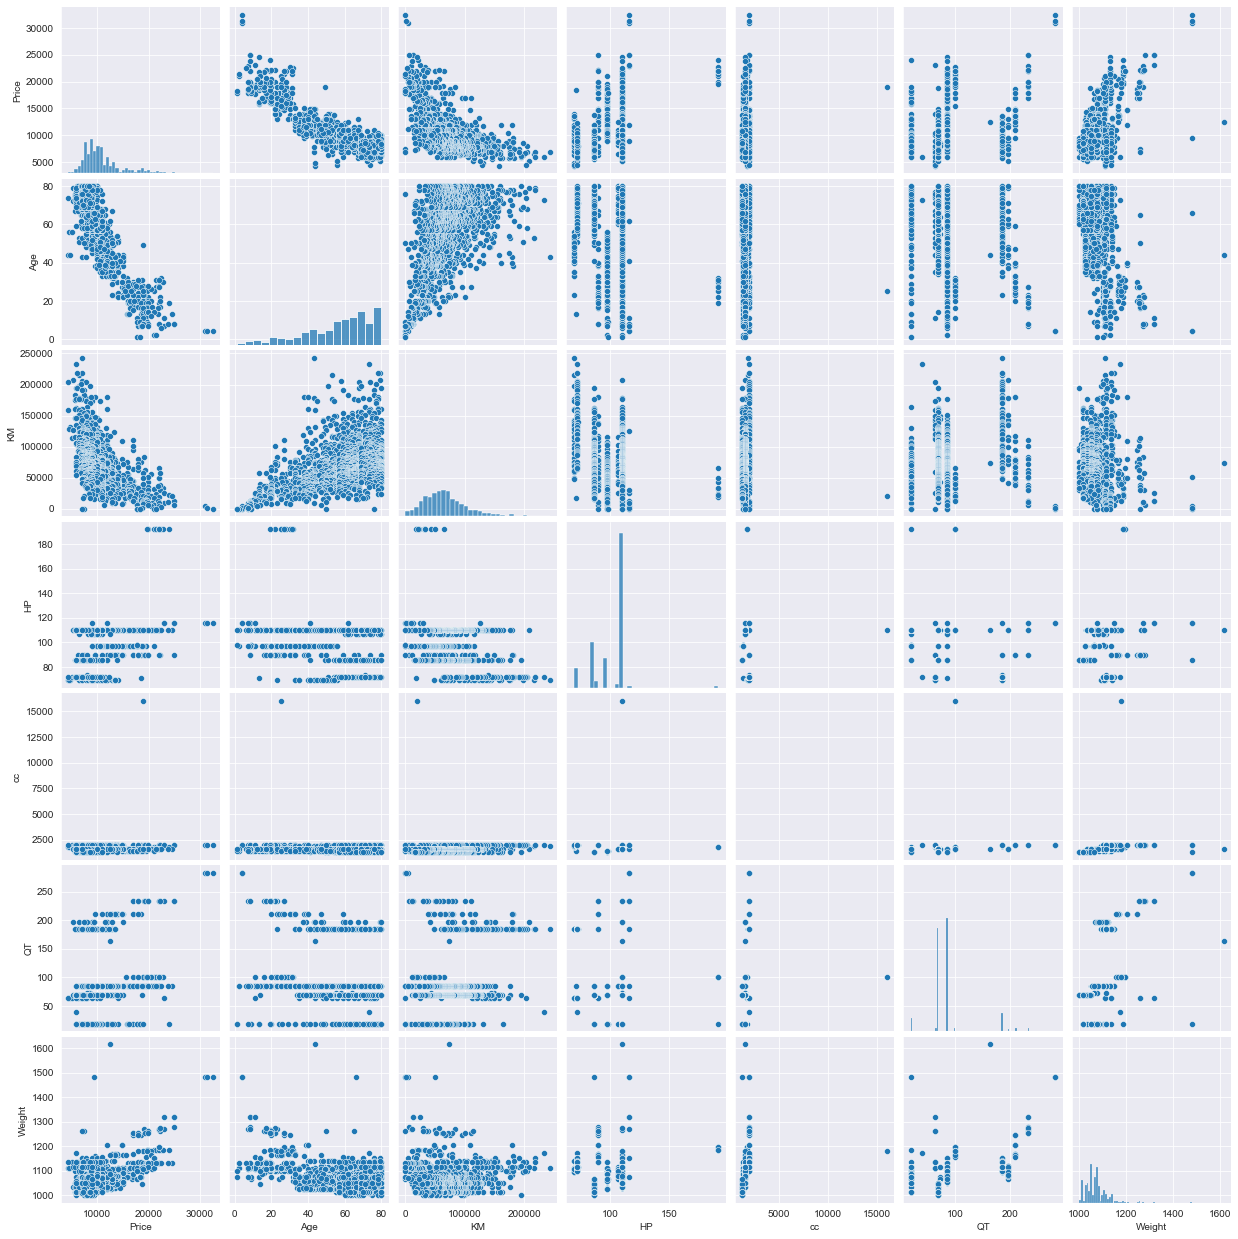

In [16]:
# creating the pairplot using the darkgrid style
sns.set_style(style='darkgrid')
sns.pairplot(model)
plt.show()

<AxesSubplot:>

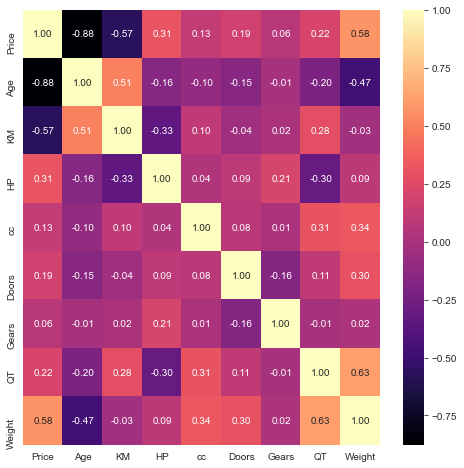

In [25]:
corr = toyota2.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(8, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")


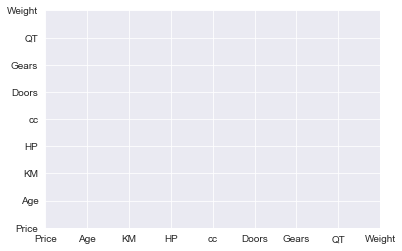

In [26]:
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns)
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

# MLR

In [27]:
X = toyota2.drop('Price', axis = 1).values
y = toyota2.iloc[:, 0].values.reshape(-1,1)

In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [29]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1077, 8)
Shape of X_test:  (359, 8)
Shape of y_train:  (1077, 1)
Shape of y_test (359, 1)


In [30]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [33]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score 

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.7719638138218411
R2_score (train):  0.8640307618150082
R2_score (test):  0.8614722799605135
RMSE:  1402.0810748973893


# using the OLS method

In [17]:

model1 = smf.ols('Price~Age+KM+HP+cc+QT+Weight',data = model).fit()
model1.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000001A8717B7F70>>

In [18]:
# checking on the parameters of the model1

model1.params

Intercept   -2669.484315
Age          -121.792943
KM             -0.020546
HP             33.685785
cc             -0.124385
QT              4.192242
Weight         16.815621
dtype: float64

In [19]:
print(model1.tvalues, '\n\n', model1.pvalues)

Intercept    -2.539366
Age         -46.448533
KM          -16.410631
HP           12.287927
cc           -1.377358
QT            3.206525
Weight       16.238939
dtype: float64 

 Intercept     1.121062e-02
Age          7.864089e-288
KM            1.400419e-55
HP            4.599946e-33
cc            1.686173e-01
QT            1.373227e-03
Weight        1.499666e-54
dtype: float64


In [20]:
(model1.rsquared,model1.rsquared_adj)

(0.8628570632699418, 0.8622812356839513)

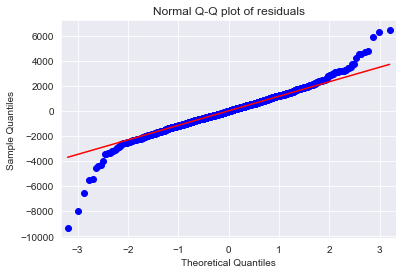

In [21]:
# importing the stats module

import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [22]:
# printing the list where residul is greater than the 10

list(np.where(model1.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  210,  211,  216,
         223,  230,  232,  233,  237, 

In [23]:
# creating the  module using the ols method 

ml_CC = smf.ols('Price~cc',data=model).fit()
print(ml_CC.tvalues, '\n\n', ml_CC.pvalues) 

Intercept    24.694090
cc            4.824822
dtype: float64 

 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [24]:
ml_QT = smf.ols('Price~QT',data=model).fit()
print(ml_QT.tvalues, '\n', ml_QT.pvalues) 

Intercept    41.330311
QT            8.507487
dtype: float64 
 Intercept    1.532168e-246
QT            4.407393e-17
dtype: float64


In [25]:
ml_CC_QT=smf.ols('Price~cc+QT',data = model).fit()  
print(ml_CC_QT.tvalues, '\n', ml_CC_QT.pvalues)

Intercept    22.397125
cc            2.414097
QT            7.369169
dtype: float64 
 Intercept    1.654934e-95
cc           1.589894e-02
QT           2.888785e-13
dtype: float64


In [26]:
r_squared_AGE = smf.ols('Age~KM+HP+cc+QT+Weight',data=model).fit().rsquared
vif_age = 1/(1-r_squared_AGE)

r_squared_KM = smf.ols('KM~Age+HP+cc+QT+Weight',data=model).fit().rsquared
vif_km = 1/(1-r_squared_KM)

r_squared_CC = smf.ols('cc~Age+HP+KM+QT+Weight',data=model).fit().rsquared
vif_cc = 1/(1-r_squared_CC)


r_squared_QT = smf.ols('QT~Age+HP+KM+cc+Weight',data=model).fit().rsquared
vif_QT = 1/(1-r_squared_QT)

r_squared_weight = smf.ols('Weight~Age+HP+KM+cc+QT',data=model).fit().rsquared
vif_weight = 1/(1-r_squared_weight)

d1 = {'Variables': ['Age','KM','cc','QT','Weight'],'VIF':[vif_age,vif_km,vif_cc,vif_QT,vif_weight]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Age,1.884073
1,KM,1.746582
2,cc,1.163426
3,QT,2.290254
4,Weight,2.353601


In [27]:
# calculating the residual of the model1r
model1r = model1.resid
model1r

0      -3317.422641
1      -2534.232763
2      -2854.009977
3      -1481.210143
4      -2473.303708
           ...     
1431   -1265.258578
1432    2581.553403
1433      73.997148
1434   -1299.850398
1435   -3442.906500
Length: 1436, dtype: float64

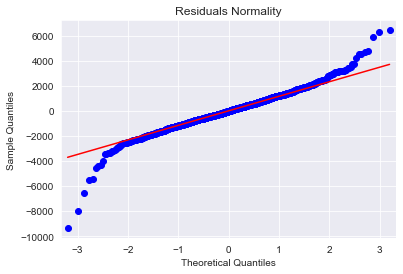

In [28]:
import statsmodels.api as smf
qq_plot = smf.qqplot(model1r , line='q')
plt.title("Residuals Normality")
plt.show()

In [29]:
# creating the list where model1r is greater than 6000
list(np.where(model1r>6000))

[array([147, 523], dtype=int64)]

In [30]:
# defining the standardized values
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

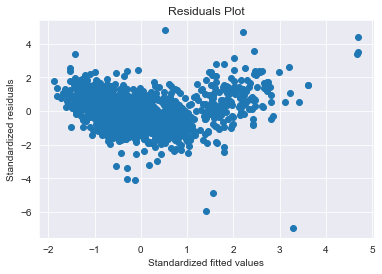

In [31]:
# plotting the scatter plot of standard values of fitted values and the model1 residuals 
plt.scatter(get_standardized_values(model1.fittedvalues),
           get_standardized_values(model1.resid))
plt.title("Residuals Plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residuals")
plt.show()

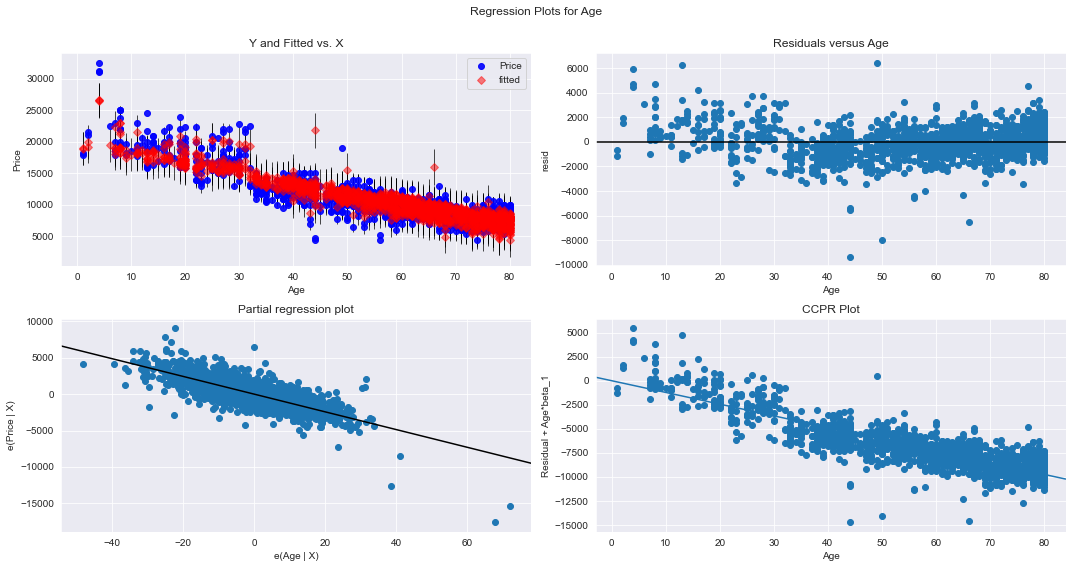

In [32]:
# plottting the regression plot for the age
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model1,"Age",fig=fig)
plt.show()

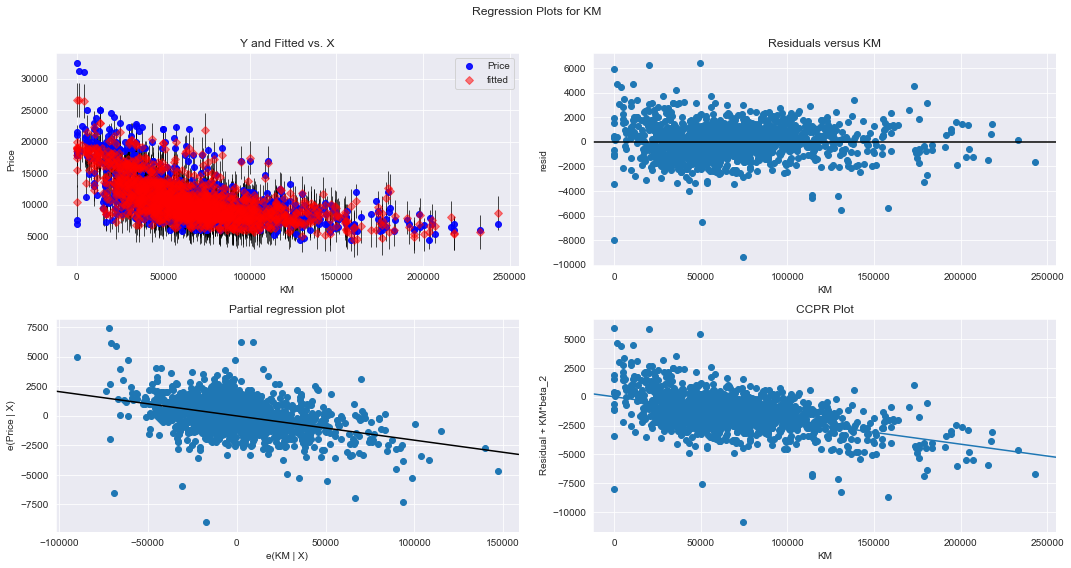

In [33]:
# plotting the regression plot for the KM

fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model1,"KM",fig=fig)
plt.show()

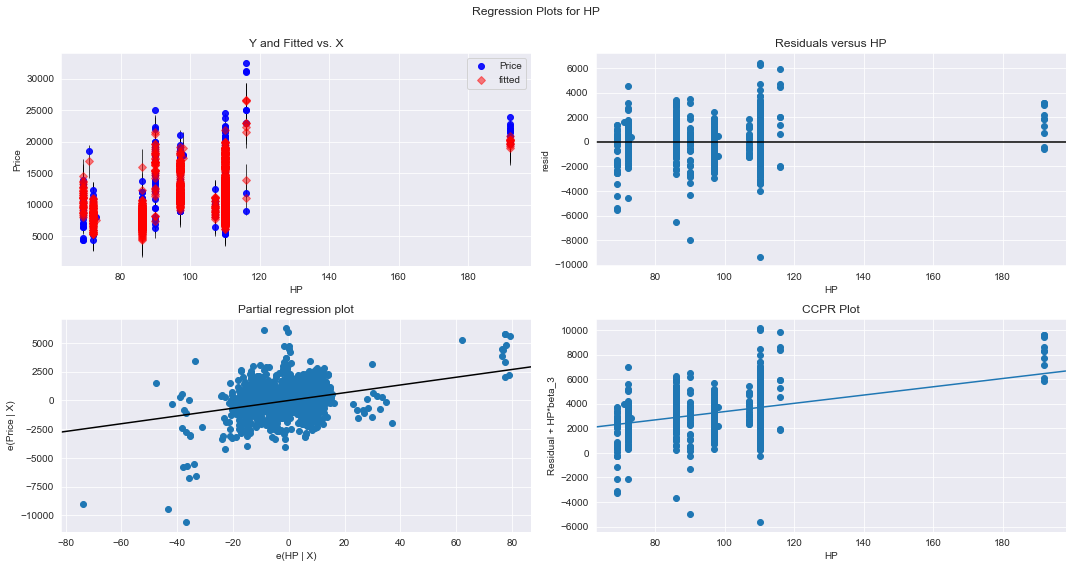

In [34]:
# PLotting the regression plot for the HP

fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model1,"HP",fig=fig)

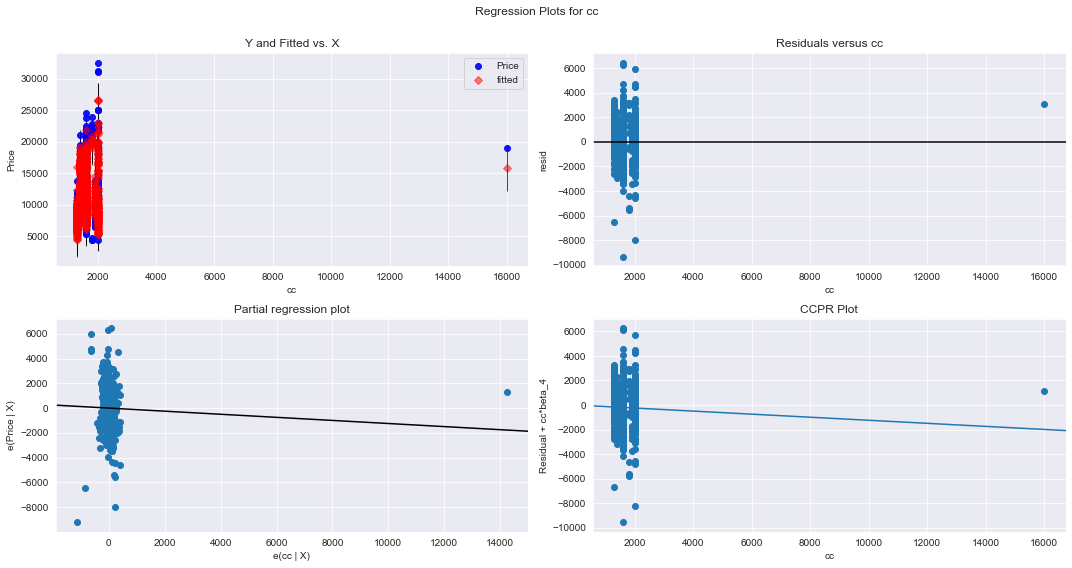

In [35]:
# plotting the regression plot for the CC

fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model1,"cc",fig=fig)

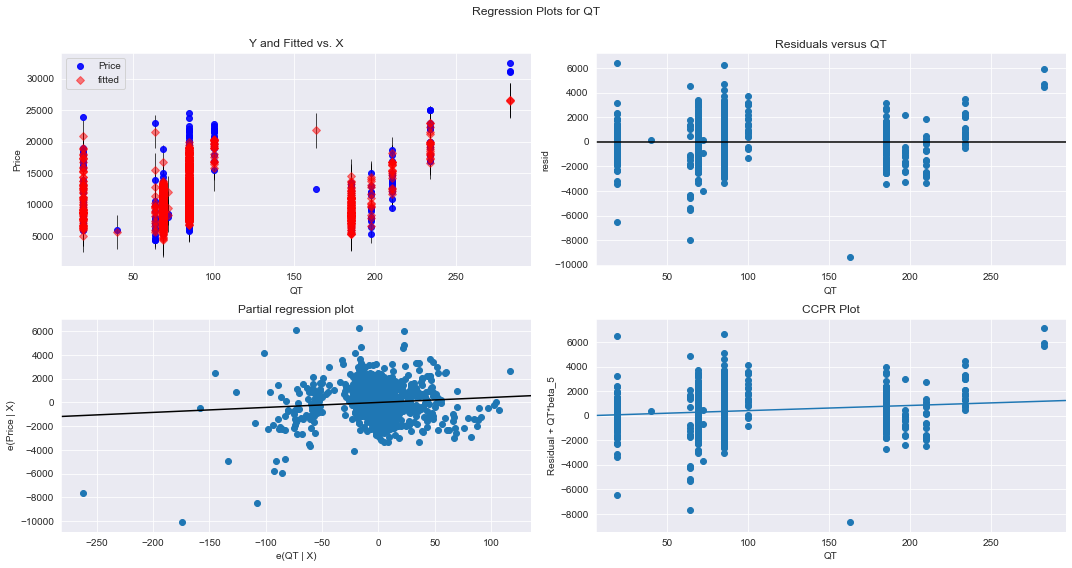

In [36]:
# plotting the regression plot for the QT

fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model1,"QT",fig=fig)

In [37]:
# calculating the cooks distance for the model1

model_influence = model1.get_influence()
(c,_) = model_influence.cooks_distance

In [38]:
c

array([7.94634117e-03, 4.31088094e-03, 6.02396204e-03, ...,
       2.67194643e-06, 8.05624057e-04, 1.35714526e-02])

Text(0, 0.5, 'Cooks Distance')

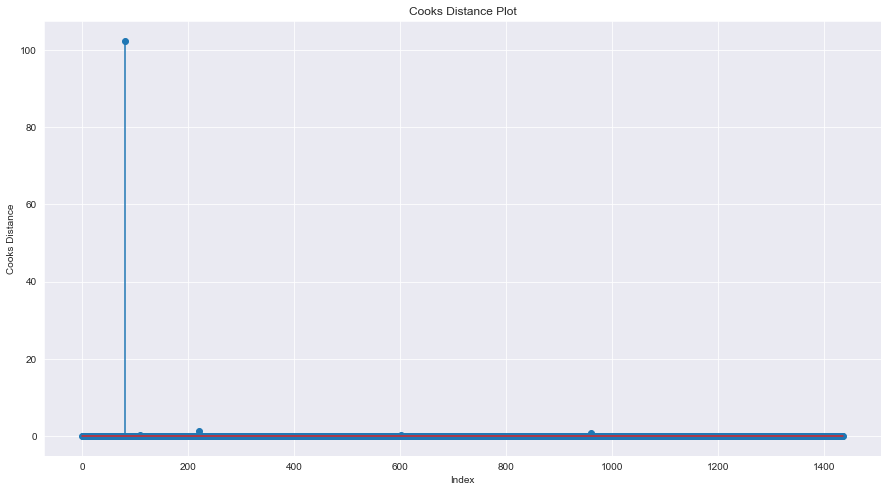

In [39]:
# plotting the cooks distance for the better understanding
import warnings
warnings.filterwarnings("ignore")

figure = plt.figure(figsize =(15,8))
plt.stem(np.arange(len(model)),np.round(c,3))
plt.title("Cooks Distance Plot")
plt.xlabel("Index")
plt.ylabel("Cooks Distance")

In [40]:
# calculating the max values in the cooks distance 

np.argmax(c),np.max(c)

(80, 102.42006677712665)

In [41]:
# importing the influence plot

from statsmodels.graphics.regressionplots import influence_plot

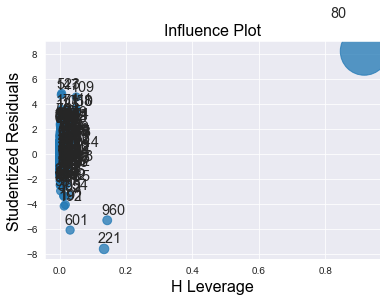

In [42]:
# ploting the influence plot

influence_plot(model1)
plt.show()

In [43]:
# k is no of columns of the model and n if the no.of the rows of the model

k = model.shape[1]
n = model.shape[0]
leverage_cutoff = (3*(k+1)/n)

In [44]:
# leverage cutoff calculated 

leverage_cutoff

0.016713091922005572

In [45]:
# dropping the 80th index of the data as it's a outlier/influencing the data 

model2 = model.drop(model.index[[80]],axis = 0).reset_index()

In [46]:
model2

,index,Price,Age,KM,HP,cc,QT,Weight
0,0,13500,23,46986,90,2000,210,1165
1,1,13750,23,72937,90,2000,210,1165
2,2,13950,24,41711,90,2000,210,1165
3,3,14950,26,48000,90,2000,210,1165
4,4,13750,30,38500,90,2000,210,1170
...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,69,1025
1431,1432,10845,72,19000,86,1300,69,1015
1432,1433,8500,71,17016,86,1300,69,1015
1433,1434,7250,70,16916,86,1300,69,1015


In [47]:
# dropping the index 

model3 = model2.drop(['index'],axis=1)

In [48]:
model3.head()

,Price,Age,KM,HP,cc,QT,Weight
0,13500,23,46986,90,2000,210,1165
1,13750,23,72937,90,2000,210,1165
2,13950,24,41711,90,2000,210,1165
3,14950,26,48000,90,2000,210,1165
4,13750,30,38500,90,2000,210,1170


In [49]:
# importing the statsmodel
# creating a fina; model for the price 
# getting the summary 

import statsmodels.formula.api as smf
final_ml_cc = smf.ols('Price~Age+KM+HP+cc+QT+Weight',data = model3).fit()
final_ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1573.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:56:05   Log-Likelihood:                -12339.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1428   BIC:                         2.473e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3643.4063   1034.489     -3.522      0.000   -5672.688   -1614.124
Age         -120.5692      2.568    -46.958      0.000    -125.606    -115.532
KM            -0.0176      0.001    -13.812      0.000      -0.020      -0.015
HP            41.0948      2.828     14.532      0.000      35.548      46.642
cc            -2.5355      0.307     -8.264      0.000      -3.137      -1.934
QT             9.3512      1.424      6.565      0.000       6.557      12.145
Weight        19.8727      1.079     18.423      0.000      17.757      21.989
==============================================================================
Omnibus:                      238.534   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2475.164
Skew:                          -0.431   Prob(JB):                         0.00
Kurtosis:                       9.376   Cond. No.                     2.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
import statsmodels.formula.api as smf
final_ml_qt = smf.ols('Price~Age+KM+HP+QT+Weight',data = model3).fit()
final_ml_qt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1789.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:56:07   Log-Likelihood:                -12373.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1429   BIC:                         2.479e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2509.8635   1049.222     -2.392      0.017   -4568.045    -451.682
Age         -121.8232      2.623    -46.448      0.000    -126.968    -116.678
KM            -0.0206      0.001    -16.525      0.000      -0.023      -0.018
HP            33.3669      2.731     12.218      0.000      28.010      38.724
QT             4.0029      1.298      3.083      0.002       1.456       6.550
Weight        16.5366      1.024     16.156      0.000      14.529      18.544
==============================================================================
Omnibus:                      143.306   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              902.103
Skew:                          -0.201   Prob(JB):                    1.29e-196
Kurtosis:                       6.863   Cond. No.                     2.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# calculating the cooks distance again  

model_influence1 = final_ml_cc.get_influence()
(c1,_)= model_influence1.cooks_distance

In [52]:
c1

array([7.46590503e-03, 3.91570024e-03, 5.43742321e-03, ...,
       1.33351891e-06, 1.03237734e-03, 1.21588637e-02])

Text(0, 0.5, 'Cooks Distance')

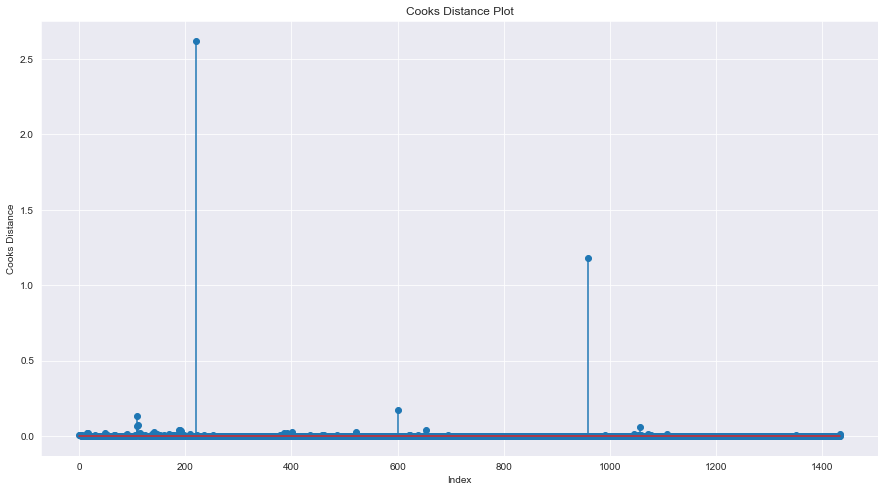

In [53]:
# plotting the stem using the cooks distance
import warnings
warnings.filterwarnings("ignore")

figure = plt.figure(figsize =(15,8))
plt.stem(np.arange(len(model3)),np.round(c1,3))
plt.title("Cooks Distance Plot")
plt.xlabel("Index")
plt.ylabel("Cooks Distance")

In [54]:
# finding the max points.influencer point

np.argmax(c1),np.max(c1)

(220, 2.621241661872462)

In [55]:
# dropping the 220th point as it's a influencer

model4 = model3.drop(model3.index[[220]],axis = 0).reset_index()

In [56]:
model4.head()

,index,Price,Age,KM,HP,cc,QT,Weight
0,0,13500,23,46986,90,2000,210,1165
1,1,13750,23,72937,90,2000,210,1165
2,2,13950,24,41711,90,2000,210,1165
3,3,14950,26,48000,90,2000,210,1165
4,4,13750,30,38500,90,2000,210,1170


In [57]:
# dropping index again 

model5 = model4.drop(['index'],axis=1)

In [58]:
model5.head()

,Price,Age,KM,HP,cc,QT,Weight
0,13500,23,46986,90,2000,210,1165
1,13750,23,72937,90,2000,210,1165
2,13950,24,41711,90,2000,210,1165
3,14950,26,48000,90,2000,210,1165
4,13750,30,38500,90,2000,210,1170


In [59]:
# getting summary fo the model

final_ml_cc = smf.ols('Price~Age+KM+HP+cc+QT+Weight',data = model5).fit()
final_ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1693.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:56:14   Log-Likelihood:                -12284.
No. Observations:                1434   AIC:                         2.458e+04
Df Residuals:                    1427   BIC:                         2.462e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7597.6576   1079.950     -7.035      0.000   -9716.117   -5479.198
Age         -116.7608      2.516    -46.399      0.000    -121.697    -111.824
KM            -0.0171      0.001    -13.848      0.000      -0.020      -0.015
HP            40.7754      2.738     14.890      0.000      35.404      46.147
cc            -3.1815      0.304    -10.455      0.000      -3.778      -2.585
QT             8.3344      1.383      6.026      0.000       5.621      11.048
Weight        24.3949      1.142     21.363      0.000      22.155      26.635
==============================================================================
Omnibus:                      178.461   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1399.901
Skew:                          -0.282   Prob(JB):                    1.04e-304
Kurtosis:                       7.807   Cond. No.                     2.51e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
final_ml_qt = smf.ols('Price~Age+KM+HP+QT+Weight',data = model5).fit()
final_ml_qt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1868.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:56:14   Log-Likelihood:                -12337.
No. Observations:                1434   AIC:                         2.469e+04
Df Residuals:                    1428   BIC:                         2.472e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5327.8512   1097.287     -4.855      0.000   -7480.318   -3175.384
Age         -119.1410      2.599    -45.834      0.000    -124.240    -114.042
KM            -0.0209      0.001    -17.003      0.000      -0.023      -0.018
HP            31.6076      2.691     11.746      0.000      26.329      36.886
QT             2.1736      1.298      1.675      0.094      -0.372       4.720
Weight        19.3599      1.074     18.027      0.000      17.253      21.467
==============================================================================
Omnibus:                      124.926   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              662.998
Skew:                          -0.190   Prob(JB):                    1.08e-144
Kurtosis:                       6.309   Cond. No.                     2.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
model_influence1 = final_ml_cc.get_influence()
(c2,_)= model_influence1.cooks_distance

In [62]:
c2

array([7.45231651e-03, 3.85932342e-03, 5.35334588e-03, ...,
       4.31615245e-07, 1.06112018e-03, 1.60620933e-02])

Text(0, 0.5, 'Cooks Distance')

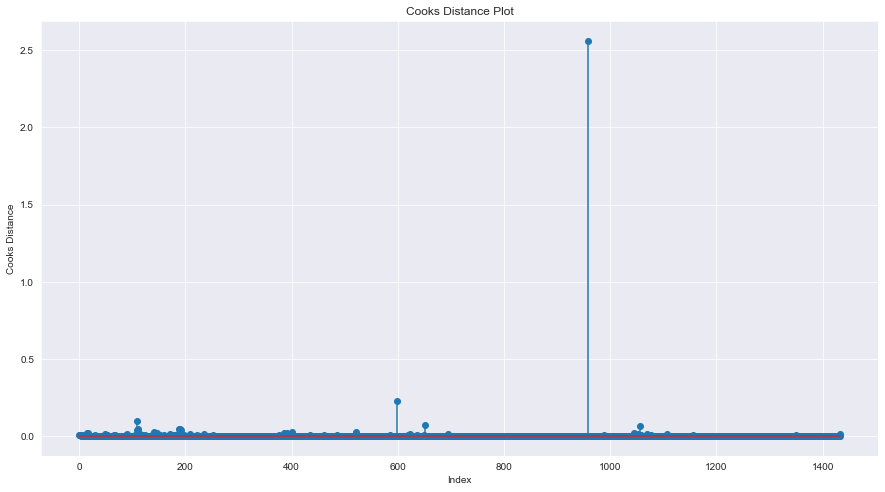

In [63]:
import warnings
warnings.filterwarnings("ignore")

figure = plt.figure(figsize =(15,8))
plt.stem(np.arange(len(model5)),np.round(c2,3))
plt.title("Cooks Distance Plot")
plt.xlabel("Index")
plt.ylabel("Cooks Distance")

In [64]:
np.argmax(c2),np.max(c2)

(958, 2.562389668580901)

In [65]:
model6 = model5.drop(model5.index[[958]],axis = 0).reset_index()

In [66]:
model6.head()

,index,Price,Age,KM,HP,cc,QT,Weight
0,0,13500,23,46986,90,2000,210,1165
1,1,13750,23,72937,90,2000,210,1165
2,2,13950,24,41711,90,2000,210,1165
3,3,14950,26,48000,90,2000,210,1165
4,4,13750,30,38500,90,2000,210,1170


In [67]:
model7 = model6.drop(['index'],axis=1)

In [68]:
model7.head()

,Price,Age,KM,HP,cc,QT,Weight
0,13500,23,46986,90,2000,210,1165
1,13750,23,72937,90,2000,210,1165
2,13950,24,41711,90,2000,210,1165
3,14950,26,48000,90,2000,210,1165
4,13750,30,38500,90,2000,210,1170


In [69]:
final_ml_cc = smf.ols('Price~Age+KM+HP+cc+QT+Weight',data = model7).fit()
final_ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1802.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:56:21   Log-Likelihood:                -12237.
No. Observations:                1433   AIC:                         2.449e+04
Df Residuals:                    1426   BIC:                         2.452e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.166e+04   1143.129    -10.198      0.000   -1.39e+04   -9415.501
Age         -112.5472      2.493    -45.152      0.000    -117.437    -107.658
KM            -0.0169      0.001    -14.075      0.000      -0.019      -0.015
HP            38.0041      2.682     14.169      0.000      32.743      43.265
cc            -3.6933      0.301    -12.251      0.000      -4.285      -3.102
QT             5.8442      1.374      4.254      0.000       3.149       8.539
Weight        29.1712      1.231     23.701      0.000      26.757      31.586
==============================================================================
Omnibus:                      108.252   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.072
Skew:                          -0.073   Prob(JB):                    9.72e-120
Kurtosis:                       6.026   Cond. No.                     2.73e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
final_ml_qt = smf.ols('Price~Age+KM+HP+QT+Weight',data = model7).fit()
final_ml_qt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1930.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:56:22   Log-Likelihood:                -12308.
No. Observations:                1433   AIC:                         2.463e+04
Df Residuals:                    1427   BIC:                         2.466e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8078.3341   1161.453     -6.955      0.000   -1.04e+04   -5799.996
Age         -116.2896      2.600    -44.729      0.000    -121.390    -111.190
KM            -0.0212      0.001    -17.490      0.000      -0.024      -0.019
HP            28.4469      2.697     10.548      0.000      23.157      33.737
QT            -0.4178      1.340     -0.312      0.755      -3.047       2.211
Weight        22.3122      1.152     19.370      0.000      20.053      24.572
==============================================================================
Omnibus:                      125.319   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              646.361
Skew:                          -0.211   Prob(JB):                    4.41e-141
Kurtosis:                       6.263   Cond. No.                     2.64e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
model_influence1 = final_ml_cc.get_influence()
(c3,_)= model_influence1.cooks_distance

In [72]:
c3

array([7.08646691e-03, 3.53401465e-03, 4.95896399e-03, ...,
       1.05380727e-06, 1.13754530e-03, 2.32744301e-02])

Text(0, 0.5, 'Cooks Distance')

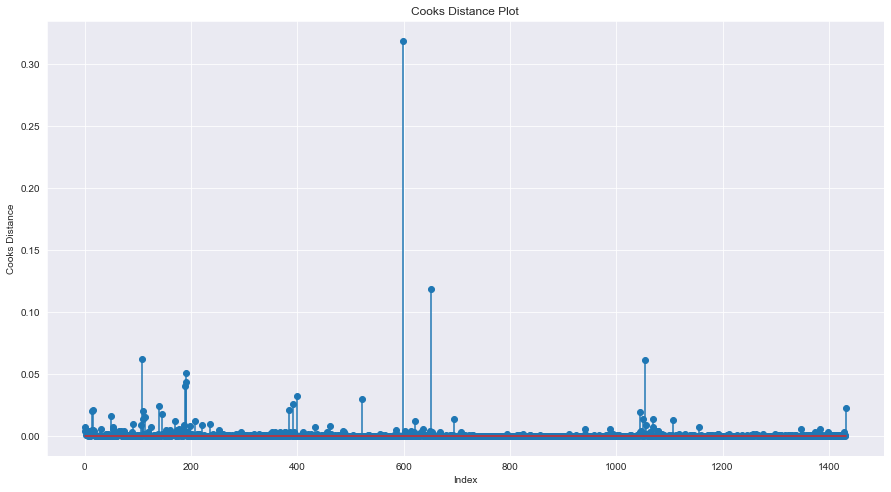

In [73]:
import warnings
warnings.filterwarnings("ignore")

figure = plt.figure(figsize =(15,8))
plt.stem(np.arange(len(model7)),np.round(c3,3))
plt.title("Cooks Distance Plot")
plt.xlabel("Index")
plt.ylabel("Cooks Distance")

In [74]:
np.argmax(c3),np.max(c3) #Since the value is <1 , we can stop the diagnostic process and finalize the model

(599, 0.31882823194750043)

In [75]:
final_ML_CC_QT= smf.ols('Price~Age+KM+HP+QT+Weight',data = model7).fit()

In [76]:
(final_ML_CC_QT.rsquared,final_ML_CC_QT.aic)

(0.8711994115950206, 24628.423763082286)

In [77]:
y_prediction = final_ML_CC_QT.predict(model7)

In [78]:
y_prediction

0       16718.609797
1       16169.303823
2       16713.976378
3       16348.277678
4       16195.767102
            ...     
1428     8750.405694
1429     8211.097246
1430     8369.382241
1431     8487.788524
1432    11060.611687
Length: 1433, dtype: float64

In [79]:
new_data = pd.DataFrame({'Age':40,"KM":4500,"HP":120,"Weight":1035,"CC":1700,'QT': 70},index=[1])

In [80]:
final_ML_CC_QT.predict(new_data)

1    13652.307327
dtype: float64